### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [13]:
data = pd.read_csv('data/coupons.csv')

In [14]:
data.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

2. Investigate the dataset for missing or problematic data.

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


<AxesSubplot:>

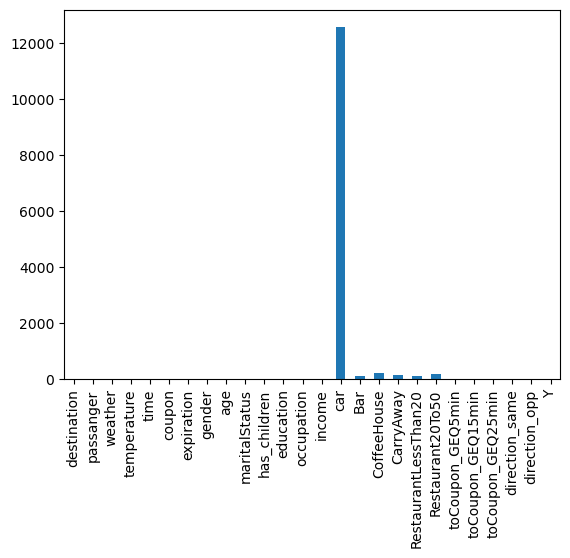

In [16]:
print(data.isnull().sum())
data.isnull().sum().plot(kind='bar')

3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
#Most of the 'car' column data is missing, so this column is dropped
data.drop(columns='car', inplace=True)

In [19]:
data

destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  ...   
2      Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3               Coffee House         2h  Female  21  Unmarried partner  ...   
4               Coffee House         1d  Female  21  Unmarried partner  ...   
...                      ...        ...     ...  ..                ...  ...   
12679  Carry out & Take away         1d    Male  26             Single  ...   
12680  Carry out & Take away         1d    Male  26             Single  ...   
12681           Coffee House         1d    Male  26             Single  ...   
12682                    Bar         1d    Male  26             Single  ...   
12683      Restaurant(20-50)         2h    Male  26             Single  ...   

       CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0            never       NaN                  4~8              1~3   
1            never       NaN                  4~8              1~3   
2            never       NaN                  4~8              1~3   
3            never       NaN                  4~8              1~3   
4            never       NaN                  4~8              1~3   
...            ...       ...                  ...              ...   
12679        never       1~3                  4~8              1~3   
12680        never       1~3                  4~8              1~3   
12681        never       1~3                  4~8              1~3   
12682        never       1~3                  4~8              1~3   
12683        never       1~3                  4~8              1~3   

      toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                    1                 0                 0              0   
1                    1                 0                 0              0   
2                    1                 1                 0              0   
3                    1                 1                 0              0   
4                    1                 1                 0              0   
...                ...               ...               ...            ...   
12679                1                 0                 0              1   
12680                1                 0                 0              0   
12681                1                 0                 0              1   
12682                1                 1                 1              0   
12683                1                 0                 0              1   

      direction_opp  Y  
0                 1  1  
1                 1  0  
2                 1  1  
3                 1  0  
4                 1  0  
...             ... ..  
12679             0  1  
12680             1  1  
12681             0  0  
12682             1  0  
12683             0  0  

[12684 rows x 25 columns]

4. What proportion of the total observations chose to accept the coupon? 



In [20]:
data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [21]:
all_data=data['Y'].shape[0]
print(all_data)
data_accept=data.query('Y==1')['Y'].shape[0]
print(data_accept)
accept_proportion=data_accept/all_data
print(accept_proportion)
#0.56 or 56% of the total observations is for coupons accepted

12684
7210
0.5684326710816777


<AxesSubplot:xlabel='Y', ylabel='count'>

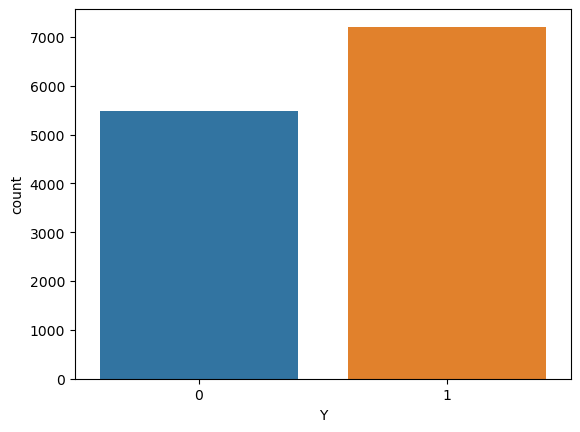

In [22]:
sns.countplot(data=data, x='Y')

5. Use a bar plot to visualize the `coupon` column.

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

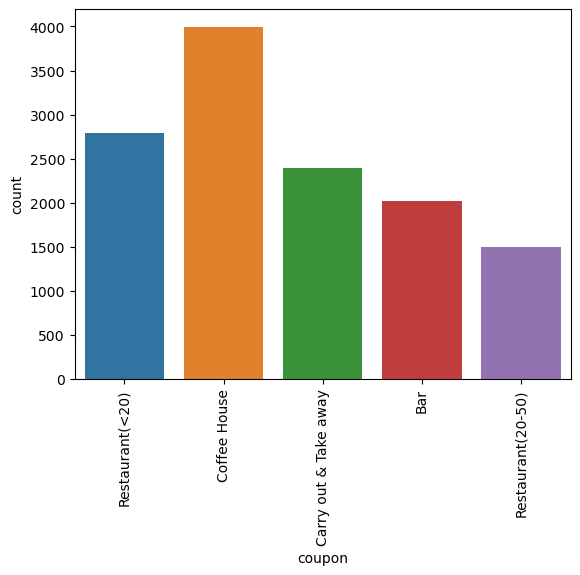

In [23]:
print(data["coupon"].value_counts())
sns.countplot(data = data, x = "coupon")
plt.xticks(rotation = 90)
# Most coupons were offered for coffee house, followed by restaurant(<20) and carryout&take-away

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Carry out & Take away'),
  Text(2, 0, 'Coffee House'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

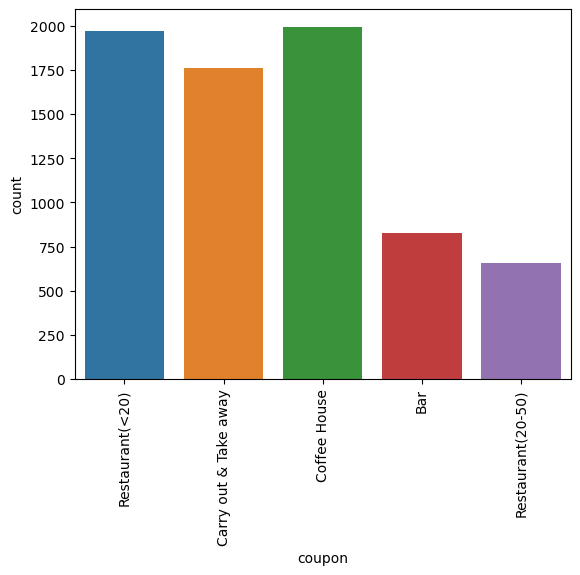

In [24]:
data_accept=data.query('Y==1')
sns.countplot(data = data_accept, x = "coupon")
plt.xticks(rotation = 90)
#Most coupons accepted were from the coffee house, followed by restaurant(<20) and carryout&take-away

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Coffee House'),
  Text(1, 0, 'Bar'),
  Text(2, 0, 'Restaurant(<20)'),
  Text(3, 0, 'Carry out & Take away'),
  Text(4, 0, 'Restaurant(20-50)')])

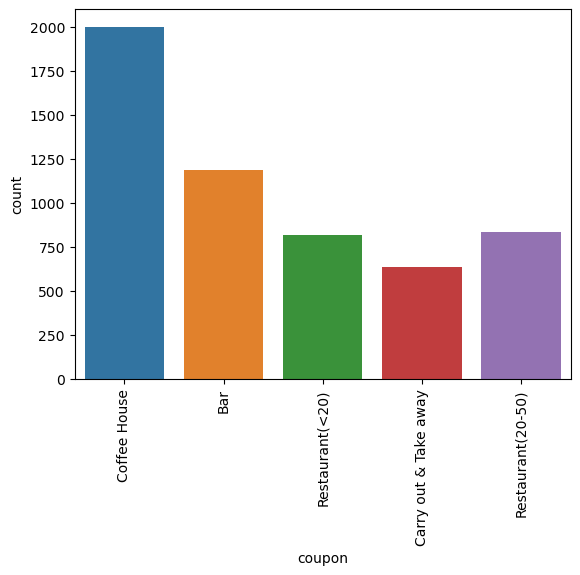

In [25]:
data_reject=data.query('Y==0')
sns.countplot(data = data_reject, x = "coupon")
plt.xticks(rotation = 90)
#Most coupons rejected were from the coffee house, followed by bar and then restaurant(20-50)

6. Use a histogram to visualize the temperature column.

In [27]:
print(data["temperature"].value_counts())
#Most of the coupons were offered at 80 degrees
px.histogram(data, x="temperature", color='Y', nbins=30, histnorm='percent')
# 54% or most of the coupons are accepted at 80 degrees, 29% at 55 degrees, 17% at 30 degrees F temperature

80    6528
55    3840
30    2316
Name: temperature, dtype: int64


In [28]:
print(data["income"].value_counts())
px.histogram(data, x="income", color='Y', nbins=30, histnorm='percent')

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


In [29]:
print(data["occupation"].value_counts())
px.histogram(data, x="occupation", color='Y', nbins=30, histnorm='percent')

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [30]:
print(data["education"].value_counts())
px.histogram(data, x="education", color='Y', nbins=30, histnorm='percent')

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64


In [31]:
print(data["gender"].value_counts())
px.histogram(data, x="gender", color='Y', nbins=30)
#fem_accept=3563/6511

Female    6511
Male      6173
Name: gender, dtype: int64


In [32]:
print(data["maritalStatus"].value_counts())
px.histogram(data, x="maritalStatus", color='Y', nbins=30, histnorm='percent')

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64


In [33]:
print(data["has_children"].value_counts())
px.histogram(data, x="has_children", color='Y', nbins=30, histnorm='percent')

0    7431
1    5253
Name: has_children, dtype: int64


In [34]:
print(data["age"].value_counts())
px.histogram(data, x="age", color='Y', nbins=30, histnorm='percent')

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64


In [94]:
print(data["coupon"].value_counts())
px.histogram(data, x="coupon", color='Y', nbins=30, histnorm='percent')

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [35]:
data_bar = data.loc[data['coupon'] == 'Bar']
data_bar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   object
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1978 non-null  

In [36]:
data_bar.isnull().sum()

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     21
CoffeeHouse             39
CarryAway               24
RestaurantLessThan20    23
Restaurant20To50        36
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
dtype: int64

2. What proportion of bar coupons were accepted?


In [37]:
total_barcoupons = data_bar["Y"].shape[0]
print(total_barcoupons)
accepted_barcoupons = data_bar.query("Y == 1")['Y'].shape[0]
print(accepted_barcoupons)
proportion_accepted=accepted_barcoupons/total_barcoupons
print(proportion_accepted)
#0.41 or 41% of bar coupons were accepted

2017
827
0.41001487357461575


<AxesSubplot:xlabel='Y', ylabel='count'>

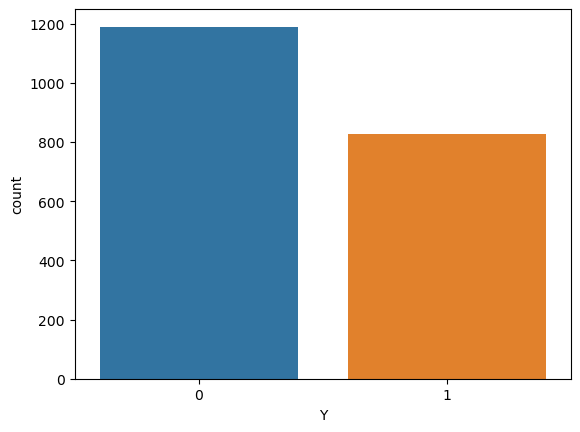

In [38]:
sns.countplot(data=data_bar, x='Y')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [39]:
print(data_bar["Bar"].value_counts())
px.histogram(data_bar, x="Bar", color='Y', nbins=30)
# Number of people who accepted the coupons(red,Y=1) are lower than who rejected the coupons(blue,Y=0) for 
#'bar' categories of 'never', 'less1', and '1~3'
# However, it is vice-versa for 'bar' categories of '4~8', 'gt8' as
# the number of perople in red(accepted) is way higher than number of perople in blue(rejected) for these

never    830
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64


In [106]:
#px.density_heatmap(data_bar, y = "Bar", x = "Y", marginal_x = "box", marginal_y="box")

In [41]:
bar_frequency_3orlesspermonth = ["never", "less1", "1~3"]
bar_frequency_morethan3= ["4~8", "gt8"]
data_bar_freq3orless=data_bar.query("Bar in @bar_frequency_3orlesspermonth")
data_bar_morethan3=data_bar.query("Bar in @bar_frequency_morethan3")

total_number_freq3orless=data_bar_freq3orless['Y'].shape[0]
print(total_number_freq3orless)
number_accept_freq3orless=data_bar_freq3orless.query("Y == 1")['Y'].shape[0]
print(number_accept_freq3orless)
percent_accept_freq3orless=number_accept_freq3orless/total_number_freq3orless*100
print(percent_accept_freq3orless)

total_number_morethan3=data_bar_morethan3['Y'].shape[0]
print(total_number_morethan3)
number_accept_morethan3=data_bar_morethan3.query("Y == 1")['Y'].shape[0]
print(number_accept_morethan3)
percent_accept_morethan3=number_accept_morethan3/total_number_morethan3*100
print(percent_accept_morethan3)
##Percent of drivers who visit bars 3 or less times per momth and accept the coupons are 37%
##Percent of drivers who visit bars more than 3 times per month and accept the coupons are 76.9%

1797
666
37.061769616026716
199
153
76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


First we look at the drivers who go to bar more than once a month and are over the age of 25

In [43]:
total_data_no=data_bar['Y'].shape[0]
print(total_data_no) ###relevant for #1

bar_morethan1=["1~3", "4~8", "gt8"]
#print(data["age"].value_counts())
age_over25=["26","31","36","41","46","50plus"]
agebar_data=data_bar.query("Bar in @bar_morethan1 and age in @age_over25")
#print(agebar_data)

number_agebar=agebar_data['Y'].shape[0]
print(number_agebar) ###relevant for #2

number_agebar_accept=agebar_data.query('Y==1')['Y'].shape[0]
print(number_agebar_accept) ####relevant for #1,2,3

#1 
# % of drivers who frequent bar>1 &are>25 yr age who accepted the bar coupon,from the total no. of drivers who got bar coupons
# is 14.5%
percent_agebar_accept_fromall=number_agebar_accept/total_data_no*100
print(percent_agebar_accept_fromall)

#2 
# % of drivers who frequent bar>1 & are>25 yr age who accept the bar coupon, from the total no. of drivers 
# who frequent bar>1 &are >25 yr age and got'bar'coupons
# is 69.5%
percent_agebar_accept_from_agebar=number_agebar_accept/number_agebar*100
print(percent_agebar_accept_from_agebar)

#3
# % of drivers who frequent bar>1 & are>25 yr age who accept the bar coupon,from the total no. of drivers who accept bar coupons
# is 35%
total_data_bar_accept=data_bar.query('Y==1')['Y'].shape[0]
print(total_data_bar_accept)
percent_agebar_accept=number_agebar_accept/total_data_bar_accept*100
print(percent_agebar_accept)


2017
420
292
14.476945959345564
69.52380952380952
827
35.30834340991535


In [44]:
px.histogram(agebar_data, x="Bar", color='Y', nbins=30)

In [45]:
px.density_heatmap(data_frame=agebar_data,x='Bar',y='age',facet_col='Y',histnorm='percent')

Now we look at the drivers who DO NOT go to bar more than once a month and are NOT over the age of 25

In [51]:
total_data_no=data_bar['Y'].shape[0]
print(total_data_no) ###relevant for #1

#print(data["age"].value_counts())
barnot_data=data_bar.query("Bar != @bar_morethan1")
agebarnot_data=barnot_data.query("age != @age_over25")
#print(agebarnot_data)

number_agebarnot=agebarnot_data['Y'].shape[0]
print(number_agebarnot) ###relevant for #2

number_agebarnot_accept=agebarnot_data.query('Y==1')['Y'].shape[0]
print(number_agebarnot_accept) ####relevant for #1,2,3


#1 
# % of drivers who do not frequent bar>1 &are not >25 yr age who accepted the bar coupon,from the total no. of drivers 
# who got bar coupons is 6.4%
percent_agebarnot_accept_fromall=number_agebarnot_accept/total_data_no*100
print(percent_agebarnot_accept_fromall)

#2 
# % of drivers who do not frequent bar>1 & are not >25 yr age who accept the bar coupon, from the total no. of drivers 
# who do not frequent bar>1 &are not>25 yr age and got'bar'coupons
# is 39.3%
percent_agebarnot_accept_from_agebarnot=number_agebarnot_accept/number_agebarnot*100
print(percent_agebarnot_accept_from_agebarnot)

#3
# % of drivers who do not frequent bar>1 & are not >25 yr age who accept the bar coupon,from the total no. of drivers who 
# accept bar coupons is 15%
total_data_bar_accept=data_bar.query('Y==1')['Y'].shape[0]
print(total_data_bar_accept)
percent_agebarnot_accept=number_agebarnot_accept/total_data_bar_accept*100
print(percent_agebarnot_accept)

2017
328
129
6.395637084779375
39.329268292682926
827
15.598548972188633


In [52]:
px.histogram(agebarnot_data, x="Bar", color='Y', nbins=30)

In [53]:
px.density_heatmap(data_frame=agebarnot_data,x='Bar',y='age',facet_col='Y',histnorm='percent')

Comparing the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others shows that there is a difference between the two, and the drivers who go to a bar more than once and are >25 have a higher percentage acceptance rate.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [67]:
bar_morethan1=["1~3", "4~8", "gt8"]
#print(data_bar['passanger'].value_counts())
passanger_notkid = ["Alone","Friend(s)","Partner"]
#print(data_bar['occupation'].value_counts())
occupation_farming_fishing_forestry = ["Farming Fishing & Forestry"]
data_q5=data_bar.query("Bar in @bar_morethan1 and passanger in @passanger_notkid and occupation not in @occupation_farming_fishing_forestry")

number_q5=data_q5['Y'].shape[0]
print(number_q5)

number_q5_accept=data_q5.query('Y==1')['Y'].shape[0]
print(number_q5_accept)

percent_accept=number_q5_accept/number_q5*100
print(percent_accept)
## 71% of drivers who go to bars more than once a month and had passengers that were not a kid and had occupations 
## other than farming, fishing, or forestry accepted the bar coupon

551
393
71.32486388384754


In [91]:
px.density_heatmap(data_q5, x= "passanger", y = "Y",marginal_x = "histogram",marginal_y="histogram")

In [68]:
px.density_heatmap(data_frame=data_q5,x='Bar',y='passanger',facet_col='Y',histnorm='percent')

In [69]:
px.density_heatmap(data_frame=data_q5,x='Bar',y='occupation',facet_col='Y',histnorm='percent')

In [70]:
px.density_heatmap(data_frame=data_q5,x='occupation',y='passanger',facet_col='Y',histnorm='percent')

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [73]:
bar_morethan1=["1~3", "4~8", "gt8"]
passanger_notkid = ["Alone","Friend(s)","Partner"]
widowed_marital_status = ["Widowed"]
age_under30 = ["below21","21","26"]
restaurant_less20frequency = ["4~8","gt8"]
income_lessthan50K = ["Less than $12500","$12500 - $24999","$25000 - $37499","$37500 - $49999"]

#1 go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71% accept bar coupons
data1 = data_bar.query("Bar in @bar_morethan1 and passanger in @passanger_notkid and maritalStatus not in @widowed_marital_status")

number_data1=data1['Y'].shape[0]
print(number_data1)
number_data1_accept=data1.query('Y==1')['Y'].shape[0]
print(number_data1_accept)
percent_accept1=number_data1_accept/number_data1*100
print(percent_accept1)

#2 go to bars more than once a month and are under the age of 30: 72% accept bar coupons
data2 = data_bar.query("Bar in @bar_morethan1 and age in @age_under30")

number_data2=data2['Y'].shape[0]
print(number_data2)
number_data2_accept=data2.query('Y==1')['Y'].shape[0]
print(number_data2_accept)
percent_accept2=number_data2_accept/number_data2*100
print(percent_accept2)

#3 go to cheap restaurants more than 4 times a month and income is less than 50K: 45% accept bar coupons
data3 = data_bar.query("RestaurantLessThan20 in @restaurant_less20frequency and income in @income_lessthan50K")

number_data3=data3['Y'].shape[0]
print(number_data3)
number_data3_accept=data3.query('Y==1')['Y'].shape[0]
print(number_data3_accept)
percent_accept3=number_data3_accept/number_data3*100
print(percent_accept3)

551
393
71.32486388384754
345
249
72.17391304347827
344
156
45.348837209302324


In [79]:
#Combining the ORs: Acceptance percentage os 59%
t=data_bar.query("Bar in @bar_morethan1 and passanger in @passanger_notkid and maritalStatus not in @widowed_marital_status or Bar in @bar_morethan1 and age in @age_under30 or  RestaurantLessThan20 in @restaurant_less20frequency and income in @income_lessthan50K" )
number_t=t['Y'].shape[0]
print(number_t)
number_t_accept=t.query('Y==1')['Y'].shape[0]
print(number_t_accept)
percent_accept_t=number_t_accept/number_t*100
print(percent_accept_t)


px.density_heatmap(t, x= "Bar", y = "Y", marginal_x = "histogram",marginal_y="histogram")

776
457
58.891752577319586


In [84]:
px.density_heatmap(data_frame=t,x='occupation',y='passanger',facet_col='Y',histnorm='percent')

In [86]:
px.density_heatmap(data_frame=t,x='occupation',y='maritalStatus',facet_col='Y',histnorm='percent')

In [87]:
px.density_heatmap(data_frame=t,x='age',y='passanger',facet_col='Y',histnorm='percent')

In [89]:
px.density_heatmap(data_frame=t,x='RestaurantLessThan20',y='passanger',facet_col='Y',histnorm='percent')

In [88]:
px.density_heatmap(data_frame=t,x='income',y='passanger',facet_col='Y',histnorm='percent')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [92]:
#Drivers who accepted bar coupons go to the bar more than once per month, 
#are generally 20-26 years of age and were the 'alone' passenger

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

We will examine the "Coffee House" coupon for this exercise

In [96]:
data_coffee = data.loc[data['coupon'] == 'Coffee House']
data_coffee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3959 non-null   object
 15  CoffeeHouse           3924 non-null  

In [98]:
data_coffee.isnull().sum()

destination              0
passanger                0
weather                  0
temperature              0
time                     0
coupon                   0
expiration               0
gender                   0
age                      0
maritalStatus            0
has_children             0
education                0
occupation               0
income                   0
Bar                     37
CoffeeHouse             72
CarryAway               57
RestaurantLessThan20    50
Restaurant20To50        55
toCoupon_GEQ5min         0
toCoupon_GEQ15min        0
toCoupon_GEQ25min        0
direction_same           0
direction_opp            0
Y                        0
dtype: int64

3996
1995
0.49924924924924924


<AxesSubplot:xlabel='Y', ylabel='count'>

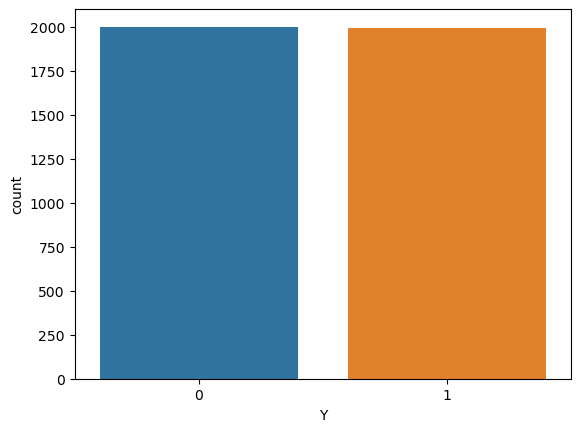

In [102]:
#What percetange of coffee house coupons were accepted?
total_coffeecoupons = data_coffee["Y"].shape[0]
print(total_coffeecoupons)
accepted_coffeecoupons = data_coffee.query("Y == 1")['Y'].shape[0]
print(accepted_coffeecoupons)
percent_coffeeaccepted=accepted_coffeecoupons/total_coffeecoupons
print(percent_coffeeaccepted)
# 50% of coffee coupons were accepted

sns.countplot(data=data_coffee, x='Y')

In [103]:
print(data_coffee["CoffeeHouse"].value_counts())
px.histogram(data_coffee, x="CoffeeHouse", color='Y', nbins=30)
# Number of people who accepted the coffee coupons (red,Y=1) are lower than who rejected the coupons(blue,Y=0) for 
# categories of 'never', 'less1'.
# However, for categories of '1~3', 4~8', 'gt8', the number of perople in red(accepted) is way higher 
# than number of perople in blue(rejected) for these

less1    1075
1~3      1042
never     927
4~8       538
gt8       342
Name: CoffeeHouse, dtype: int64


In [108]:
coffee_frequency_lessthan1 = ["never", "less1"]
coffee_frequency_morethan1= ["1~3", "4~8", "gt8"]
data_coffee_lessthan1=data_coffee.query("CoffeeHouse in @coffee_frequency_lessthan1")
data_coffee_morethan1=data_coffee.query("CoffeeHouse in @coffee_frequency_morethan1")

total_coffeenumber_lessthan1=data_coffee_lessthan1['Y'].shape[0]
print(total_coffeenumber_lessthan1)
number_coffeeaccept_lessthan1=data_coffee_lessthan1.query("Y == 1")['Y'].shape[0]
print(number_coffeeaccept_lessthan1)
percent_coffeeaccept_lessthan1=number_coffeeaccept_lessthan1/total_coffeenumber_lessthan1*100
print(percent_coffeeaccept_lessthan1)

total_coffeenumber_morethan1=data_coffee_morethan1['Y'].shape[0]
print(total_coffeenumber_morethan1)
number_coffeeaccept_morethan1=data_coffee_morethan1.query("Y == 1")['Y'].shape[0]
print(number_coffeeaccept_morethan1)
percent_coffeeaccept_morethan1=number_coffeeaccept_morethan1/total_coffeenumber_morethan1*100
print(percent_coffeeaccept_morethan1)
##Percent of drivers who visit coffee houses less than 1 times per momth and accept the coupons are 34%
##Percent of drivers who visit coffee houses more than 1 times per month and accept the coupons are 66%

2002
693
34.61538461538461
1922
1269
66.02497398543184


In [111]:
print(data_coffee["occupation"].value_counts())
px.histogram(data_coffee, x="occupation", color='Y', nbins=30)
# Students are the most likely to accept the coffee coupons if it is offered to them (312/187=1.7), 
#i.e., they are 1.7 times more likely to accept than not accept
# This followed by unemployed people, who are (309/261=1.2) 1.2 times more likely to accept than not accept

Unemployed                                   570
Student                                      499
Computer & Mathematical                      449
Sales & Related                              355
Management                                   298
Education&Training&Library                   296
Arts Design Entertainment Sports & Media     209
Office & Administrative Support              197
Retired                                      164
Business & Financial                         146
Food Preparation & Serving Related            83
Transportation & Material Moving              76
Community & Social Services                   74
Healthcare Practitioners & Technical          74
Legal                                         69
Healthcare Support                            65
Architecture & Engineering                    63
Life Physical Social Science                  61
Protective Service                            58
Personal Care & Service                       50
Construction & Extra

In [116]:
print(data_coffee["time"].value_counts())
px.histogram(data_coffee, x="time", color='Y', nbins=30)
# 10 am is the most likely time for a coffee coupon to be accepted. It is 1.8 times(576/323=1.8) likely for a coffee coupon
# to be accepted at 10 am than not accepted.
#(not shown-weather and temperature dont have a visible impact)

6PM     1093
7AM      913
10AM     899
2PM      794
10PM     297
Name: time, dtype: int64


In [118]:
print(data_coffee["gender"].value_counts())
px.histogram(data_coffee, x="gender", color='Y', nbins=30)
#Males are slightly more likely to accept than females, but its not significant enough

Female    2051
Male      1945
Name: gender, dtype: int64


In [119]:
print(data_coffee["age"].value_counts())
px.histogram(data_coffee, x="age", color='Y', nbins=30)
# Below 21 and 21 ages are 2.3(108/47) and 1.1(463/420) times respectively more likely to accept the coupon than not accept
# All other categories are as or less likely to accept than not accept
# 21 and below has the highest acceptance rate, which is lkely to be students as seen previously

21         883
26         843
31         623
50plus     545
36         402
41         325
46         220
below21    155
Name: age, dtype: int64


In [120]:
px.density_heatmap(data_frame=data_coffee,x='age',y='occupation',facet_col='Y',histnorm='percent')

In [122]:
px.density_heatmap(data_frame=data_coffee,x='age',y='CoffeeHouse',facet_col='Y',histnorm='percent')

In [124]:
# Filter for age 21 and below & examine coffee house visiting frequency
age_21andbelow=["below21","21"]
data_coffee_21=data_coffee.query("age in @age_21andbelow")
px.histogram(data_coffee_21, x="CoffeeHouse", color='Y', nbins=30)
# It still remains to be the case that the students aged 21 years and below who visit coffeehouses 
# more than 1 times per month are the most likely to accept coffeehouse coupons

In [125]:
px.density_heatmap(data_frame=data_coffee_21,x='age',y='passanger',facet_col='Y',histnorm='percent')
# Alone or if with friends, they are most likely to accept coupons

In [127]:
px.density_heatmap(data_frame=data_coffee_21,x='passanger',y='destination',facet_col='Y',histnorm='percent')
#Alone at any time (mostly to work, followed by home and NoUrgentPlace), with friends when there is NoUrgentPlace destination

In [128]:
# The hypothesis from the analyses above is that most coffee house coupons are accepted by drivers 21 years and younger
# who are students, and visit coffe houses more than once a month. The highest acceptance is usually in the morning 
# around 10 am, and most often alone or with friends.